다중공선성 문제
이러한 다중공선성 문제를 해결하기 위한 2가지 방법:

1.Ridge Regression : L2 규제화된 Linear Regression
2.Lasso Regression : L1 규제화된 LInear Regression

위 2가지 방법은 결국 작은 노이즈까지 학습하는 것을 방지하기 위해 w이 절대값이 커지는 것을 방지(규제)하는 방법을 사용합니다.

- Ridge Regression:
Loss(w)=∑i(y−y^)2+α||w||2 

상대적으로 정확도가 높다


- Lasso Regression:
Loss(w)=∑i(y−y^)2+α|w| 

더 적은 변수로 예측이 가능하다. (덜 중요한 변수는 포기)
예측시간이 빠르다. 더 좋은 장점을 갖다.
사업적용이 용이하다.
ElasticNet Regression:
Loss(w)=∑i(y−y^)2+α(β|w|+(1−β)||w||2) 

w ~ 0.1

Ridge 규제항:  |w|2∼0.01  => 대부분 변수의 weight를 작은 값.
Lasso 규제항:  |w|∼0.1  => 설명력이 낮은 변수들의 weight ~ 0

규제항을 도입한 Ridge, Lasso의 공통적인 단점:

1.기존 Loss인 MSE와 |W|에 대한 규제간의 weight factor인  α 를 튜닝해야 함.
튜닝이란? 우리가 가지고 있는 데이터 X, y에 적합한  α 를 찾는 일
여러개의  α 를 가지고 있는 모델을 학습해서, 테스트 데이터에서의  R2 가 더 좋은 것을 선택하는 일
2.p 개의 변수들을 모두 동일한 스케일로 맞추어야 한다. Scaling이라 한다.
큰 단위로 측정한 작은값변수와 작은 단위로 측정한 큰값변수가 있을 때
큰 단위로 측정한 작은값변수의 weight는 커져야 하는데, 규제항에 의해 그 중요도(weight)를 줄일 수 밖에 없고, 어떤 경우는 그 정보를 상실하게 된다.
이는 Ridge, Lasso 모두 모든 회귀계수에 일률적인 규제강도  α 를 가지기 때문
변수의 스케일 간의 차이에 의해 발생하는 이러한 문제를 해결하기 위해서는 학습전 모든 변수들을 같은 스케일을 가지도록 조정해줘야 한다.

### 인슐린 데이터 이용 의료비 예측 모델

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('insurance.csv.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
df.describe()   #다양한 통계량을 요약해서 보여줌

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


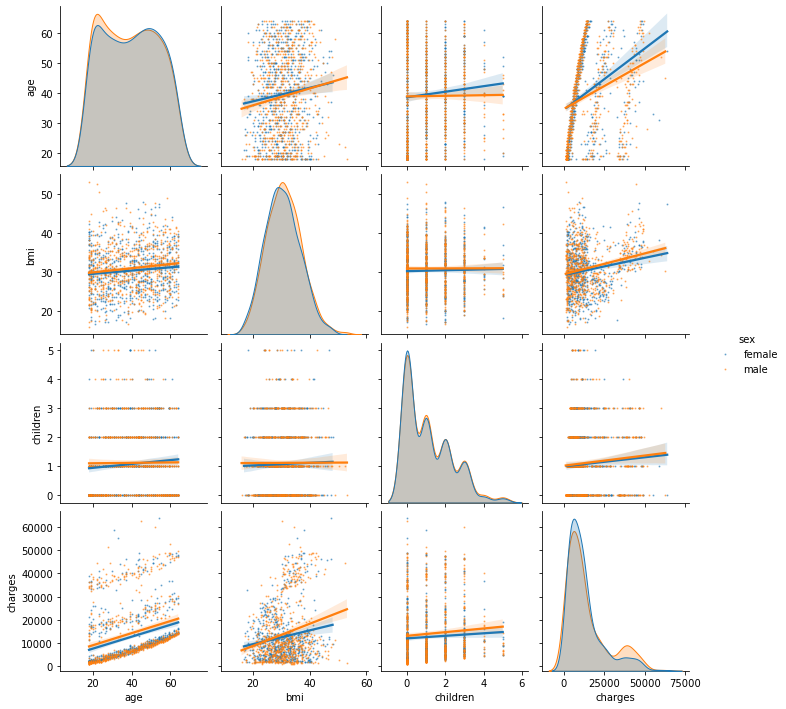

In [10]:
import seaborn as sns
sns.pairplot(df, kind='reg', hue='sex',plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})# 데이터, 그래프종류, 나눌 성분, 투명도

- bmi가 약 30 이상일 때 charges에 대한 2분포가 형성되는 것으로 보인다.
- age와 charges의 산점도에서 3개의 분포가 나타나는 것이 확인된다.
- children을 범주형으로 보는 것이 유용하다.

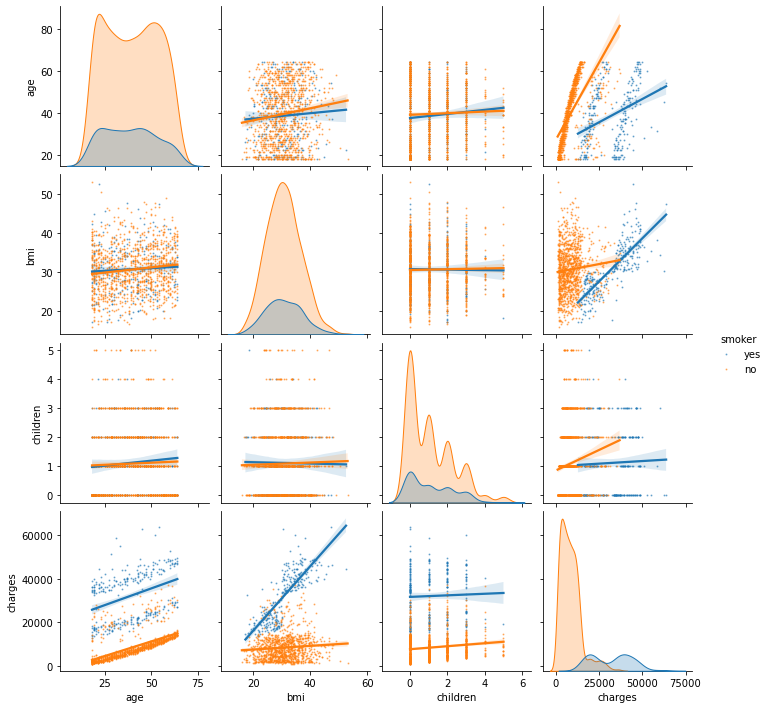

In [11]:
sns.pairplot(df, kind='reg', hue='smoker',plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

- 흡연여부에 따라 bmi에 대한 회귀계수가 달라지는 것이 명확하다.
- 특히 bmi 30을 기준으로 흡연자인 경우 2개의 분포를형성하며, 그 분산이 bmi에 따라 더 증가한다.

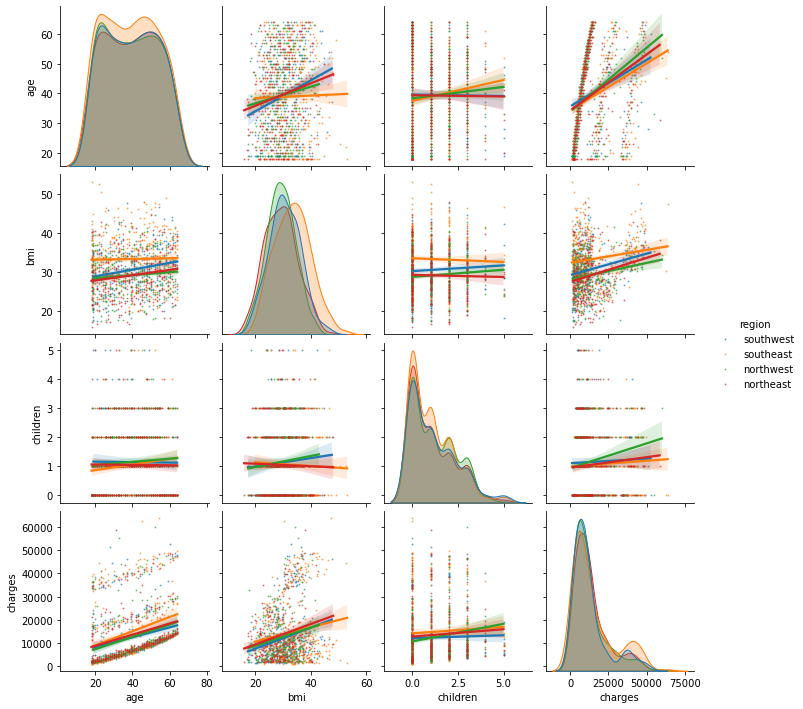

In [12]:
sns.pairplot(df, kind='reg', hue='region',plot_kws={'scatter_kws': {'alpha': 0.5, 's': 1}})

In [13]:
df['bmi30'] = np.where(df.bmi > 30, 1, 0) # 그래프 분석결과를 토대로 bmi 30 이상은 1로 데이터 추가
df

,age,sex,bmi,children,smoker,region,charges,bmi30
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,0


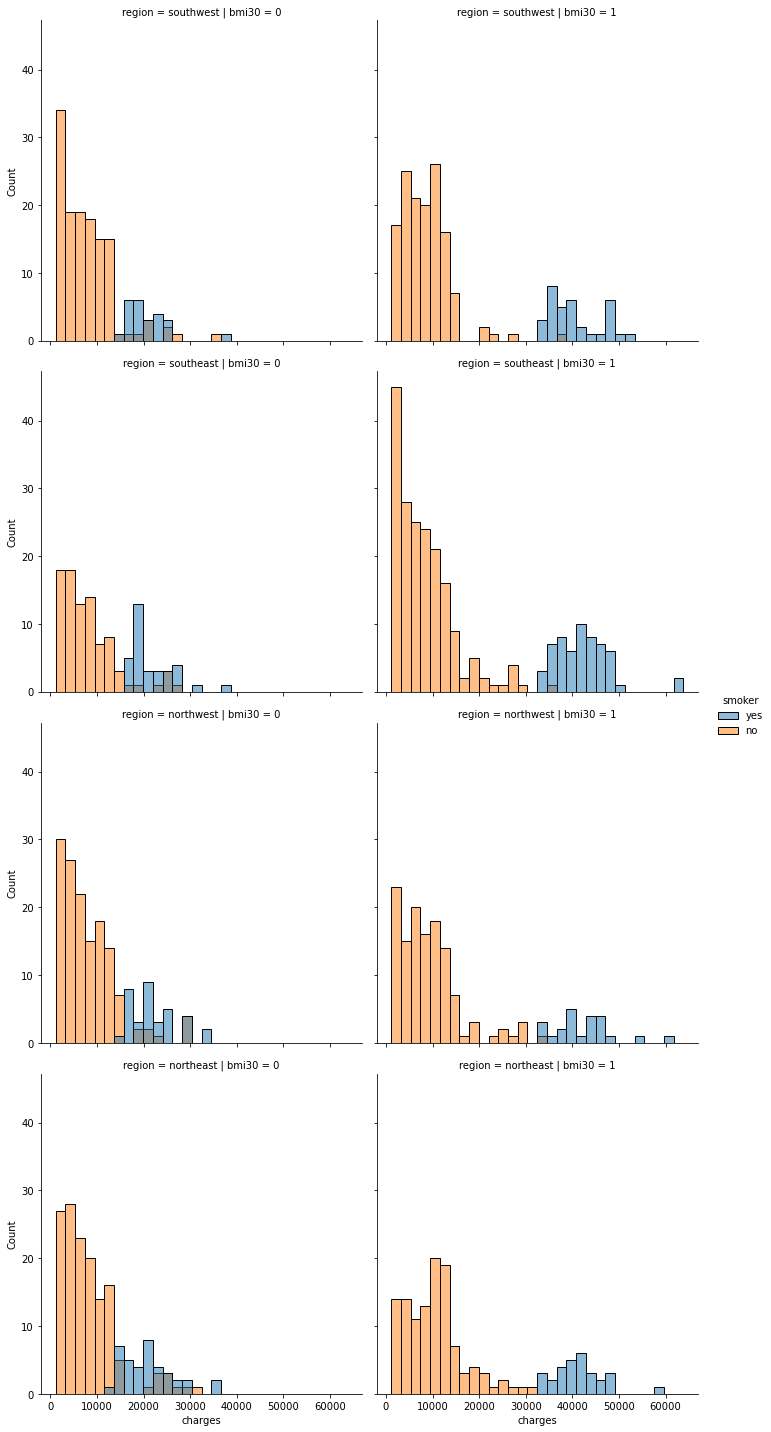

In [15]:
sns.displot(df, x='charges', hue='smoker',
            row='region', col='bmi30', )  ### 지역별로 bmi 30을 기준으로 나누며 x축을 인슐린 수치 통해 흡연과의 관계성 확인

#### 기본 데이터의 LinearRegression 스코어 확인

In [16]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(df.iloc[:, :-2], drop_first=True)        ### 데이터 프레임 끝에서 2행제외
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y)
base = LinearRegression()
base.fit(X_train, y_train)
baseScore = base.score(X_test, y_test)
baseScore

0.7346783832221895

#### 분석을 토대로 데이터 전처리(수정)
- children은 범주형으로 변환
- bmi30과 smoker와의 교호작용 존재
- bmi에 대한 2차항 필요
- 범주형 변수에 대한 one-hot-encoding

### 질문) 숫자 범주형은 원 핫 인코딩과 다르게 학습에 영향을 끼치는가? bmi 2차항은 왜 필요한가?

In [22]:
df.children = df.children.astype('str')             #범주형으로 변환(숫자 의미 X)
df.smoker = np.where(df.smoker=='yes', 1, 0)        #새로운행 계산위해
df.sex = np.where(df.sex=='male', 1, 0)             #//
df['bmi2sq'] = df.bmi ** 2
df['bmi30smk'] = df.bmi30 * df.smoker
df['bmismk'] = df.bmi * df.smoker
df['bmi2sqsmk'] = df.bmi2sq * df.smoker
df['bmisex'] = df.bmi * df.sex

X = pd.get_dummies(df.drop('charges', axis=1), drop_first=True)     #타겟 값 제외 원 핫 인코딩 후 X값
y = df.charges
X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = LinearRegression()
reg.fit(X_train, y_train)
regScore = reg.score(X_test, y_test)
regScore, baseScore

(0.08767667617848984, 0.7346783832221895)

#### 질문 클론 enumerate

In [ ]:
ms, als = [Ridge(max_iter=5000), Lasso(max_iter=5000)], range(-4, 3)  #작은 알파 값 사용을 위해 맥스 이터 사용해야함
best = {}
best['score'] = regScore
for m in enumerate(Ridge(max_iter=5000), Lasso(max_iter=5000)):
    for a in als:
        params = {'alpha':10**a}
        m = clone(m)
        m.set_params(**params)
        m.fit(X_train, y_train)
        s = m.score(X_test, y_test)
        if s > best['score']:
            best['score'] = s
            best['model'] = m
best

In [23]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.base import clone  #클론 사용으로 릿지 라쏘 동시에 for문 돌림.
ms, als = [Ridge(max_iter=5000), Lasso(max_iter=5000)], range(-4, 3)  #작은 알파 값 사용을 위해 맥스 이터 사용해야함
best = {}
best['score'] = regScore
for m in ms:
    for a in als:
        params = {'alpha':10**a}
        m = clone(m)
        m.set_params(**params)
        m.fit(X_train, y_train)
        s = m.score(X_test, y_test)
        if s > best['score']:
            best['score'] = s
            best['model'] = m
best

,age,sex,bmi,smoker,bmi30,bmi2sq,bmi30smk,bmismk,bmi2sqsmk,bmisex,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,778.410000,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1
1,18,0,33.770,0,1,1140.412900,0,0.0,0.0,0.0,1,0,0,0,0,0,1,0
2,28,0,33.000,0,1,1089.000000,0,0.0,0.0,0.0,0,0,1,0,0,0,1,0
3,33,0,22.705,0,0,515.517025,0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
4,32,0,28.880,0,0,834.054400,0,0.0,0.0,0.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,0,1,959.140900,0,0.0,0.0,0.0,0,0,1,0,0,1,0,0
1334,18,0,31.920,0,1,1018.886400,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1335,18,0,36.850,0,1,1357.922500,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0
1336,21,0,25.800,0,0,665.640000,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1
